In [140]:
past_days = 7
future_days = 1
n_lags = int(96*past_days)
horizon = int(96*future_days)

In [141]:
import pandas as pd

In [142]:
utility_data=pd.read_csv('weatherkit_plus_load.csv')

In [143]:
utility_data.event_timestamp = utility_data.event_timestamp.apply(pd.to_datetime)

In [144]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376


In [145]:
utility_data.event_timestamp[:10]

0   2023-02-11 00:30:00+05:30
1   2023-02-11 00:45:00+05:30
2   2023-02-11 01:00:00+05:30
3   2023-02-11 01:15:00+05:30
4   2023-02-11 01:30:00+05:30
5   2023-02-11 01:45:00+05:30
6   2023-02-11 02:00:00+05:30
7   2023-02-11 02:15:00+05:30
8   2023-02-11 02:30:00+05:30
9   2023-02-11 02:45:00+05:30
Name: event_timestamp, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [146]:
utility_data.event_timestamp.max()

Timestamp('2023-07-10 17:00:00+0530', tz='pytz.FixedOffset(330)')

In [147]:
utility_data['ts_month_of_year'] = utility_data.event_timestamp.apply(lambda x : x.month)

In [148]:
utility_data['ts_day_of_month'] = utility_data.event_timestamp.apply(lambda x : x.day)

In [149]:
utility_data['ts_day_of_week'] = utility_data.event_timestamp.apply(lambda x : x.dayofweek)

In [150]:
utility_data['ts_hour_of_day'] = utility_data.event_timestamp.apply(lambda x : x.hour)

In [151]:
utility_data['ts_minute_of_hour'] = utility_data.event_timestamp.apply(lambda x : x.minute)

In [152]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [153]:
target_var = 'load_MW'

In [154]:
predictor_variables = [col for col in utility_data.columns if col not in ['event_timestamp',target_var]]
predictor_variables

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h',
 'weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h',
 'ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [155]:
observed_vars = [col for col in predictor_variables if 'observed' in col]
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [156]:
forecast_vars = [col for col in predictor_variables if 'forecast' in col] # or 'ts_' in col)]
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [157]:
ts_vars = [col for col in predictor_variables if 'ts_' in col]
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [158]:
import matplotlib.pyplot as plt
import numpy as np

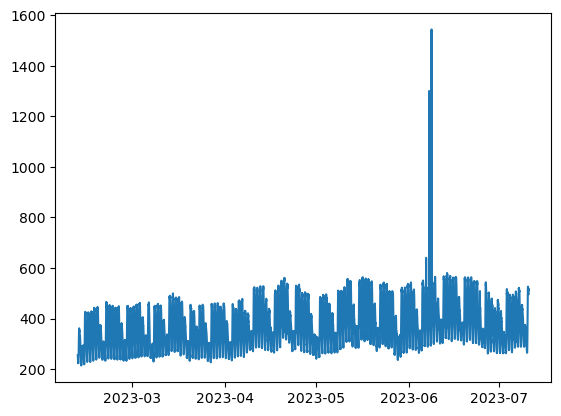

In [159]:
x = utility_data.event_timestamp
y = utility_data.load_MW
plt.plot(x,y)
plt.show()

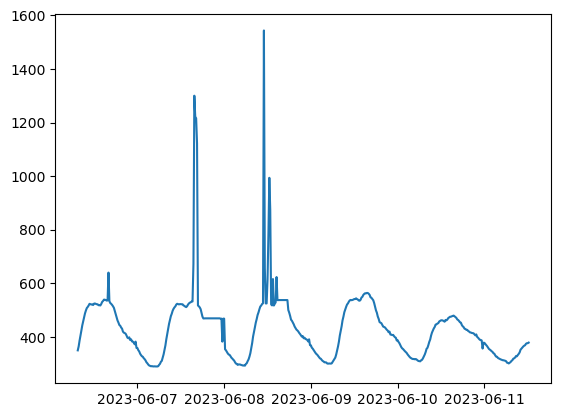

In [160]:
x = utility_data.event_timestamp[11000:11500]
y = utility_data.load_MW[11000:11500]
plt.plot(x,y)
plt.show()

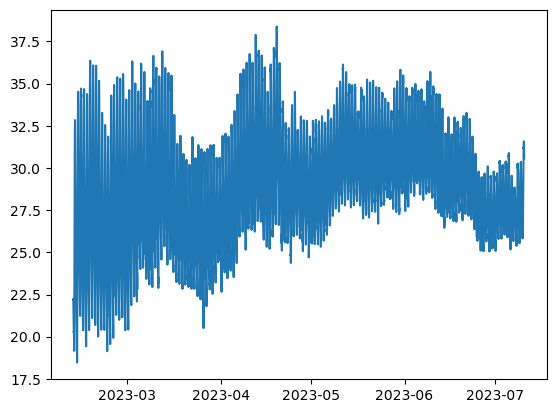

In [161]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_temperature_C
plt.plot(x,y)
plt.show()

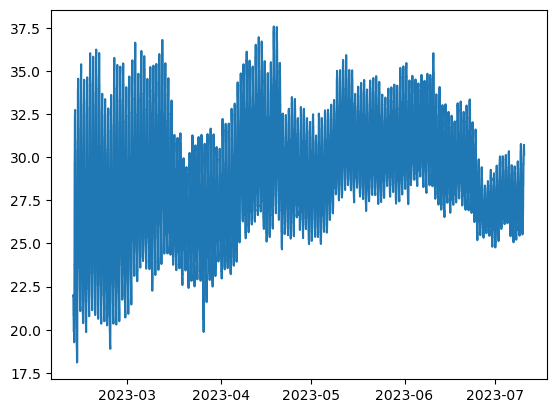

In [162]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_temp_C
plt.plot(x,y)
plt.show()

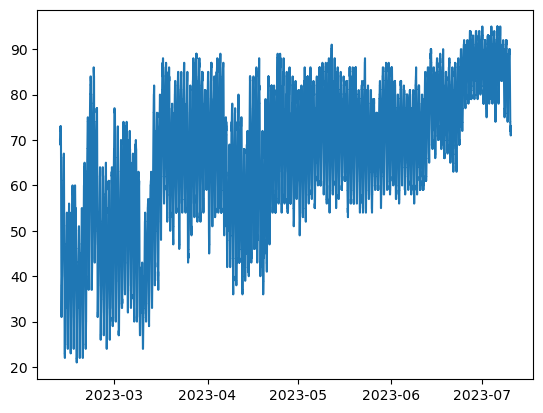

In [163]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_humidity_pc
plt.plot(x,y)
plt.show()

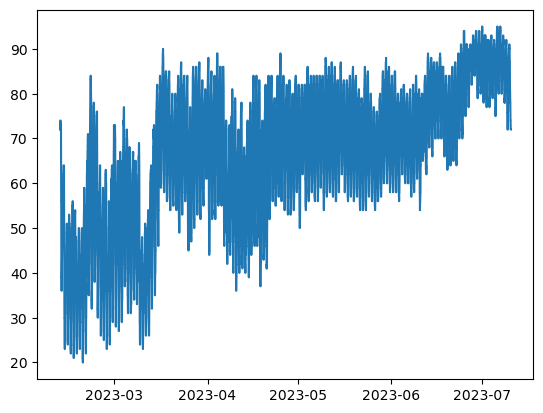

In [164]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_humidity_pc
plt.plot(x,y)
plt.show()

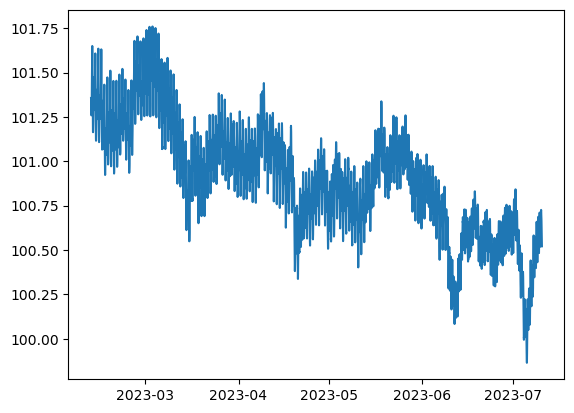

In [165]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_air_pressure_kPa
plt.plot(x,y)
plt.show()

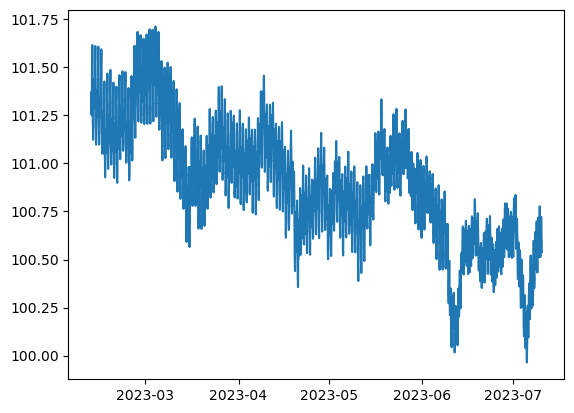

In [166]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_air_pressure_kPa
plt.plot(x,y)
plt.show()

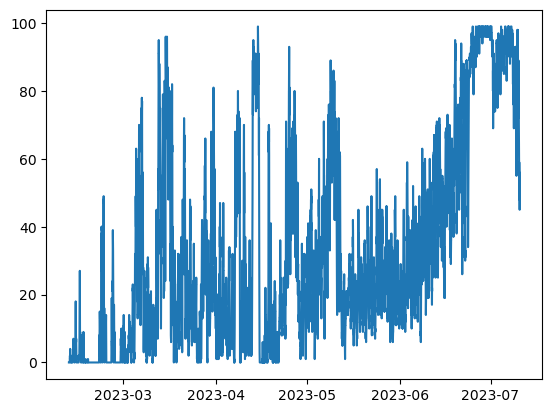

In [167]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_cloud_cover_pc
plt.plot(x,y)
plt.show()

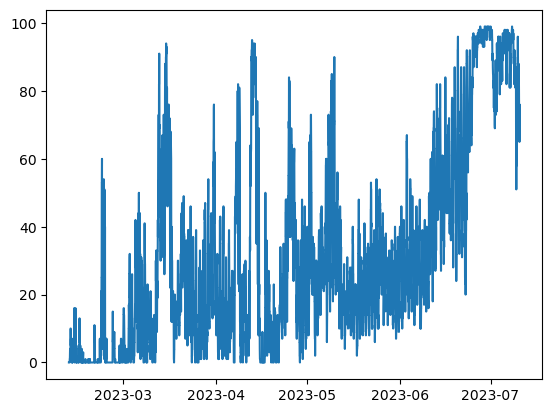

In [168]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_cloud_cover_pc
plt.plot(x,y)
plt.show()

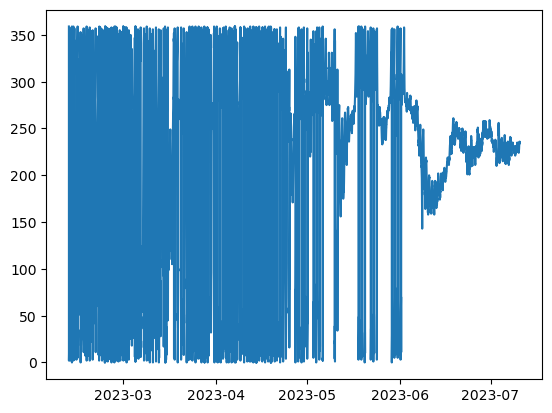

In [169]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_wind_direction_deg
plt.plot(x,y)
plt.show()

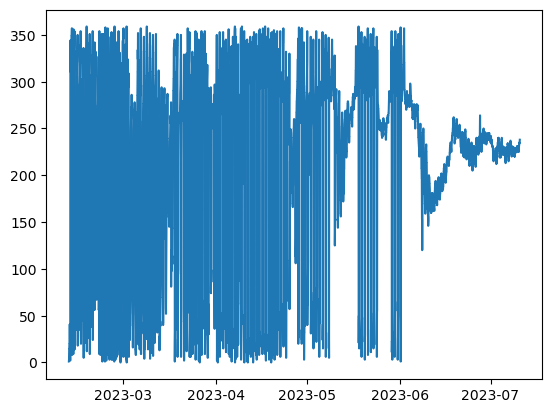

In [170]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_wind_direction_deg
plt.plot(x,y)
plt.show()

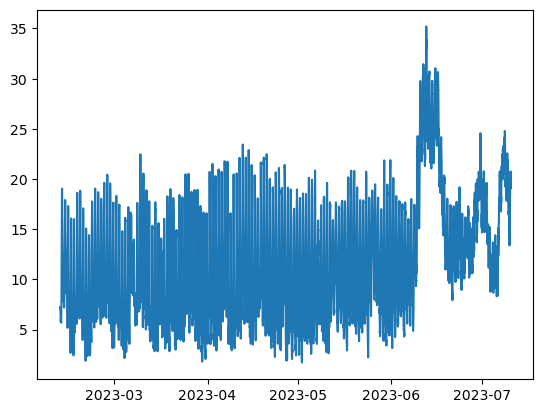

In [171]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_observed_wind_speed_km_h
plt.plot(x,y)
plt.show()

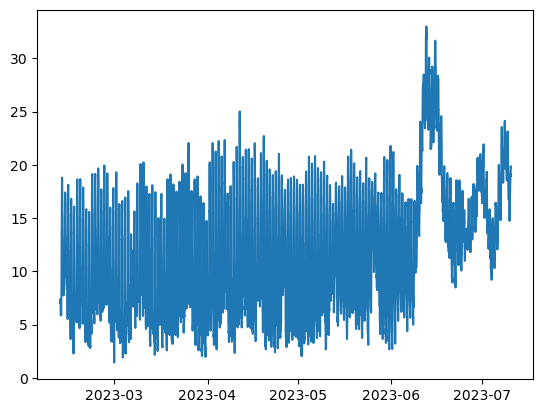

In [172]:
x = utility_data.event_timestamp
y = utility_data.weatherkit_forecast_wind_speed_km_h
plt.plot(x,y)
plt.show()

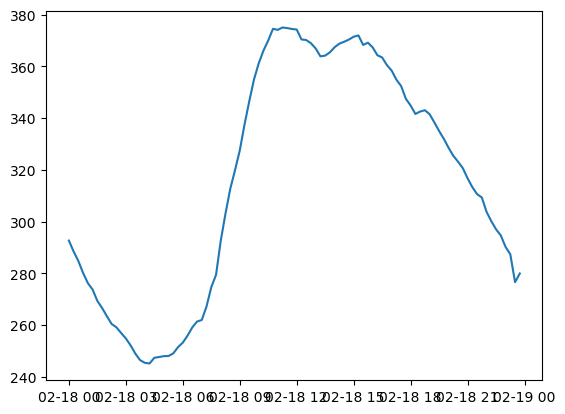

In [173]:
sub = utility_data[(utility_data['ts_month_of_year'] == 2)&
                   (utility_data['ts_day_of_month'] == 18)]
x = sub.event_timestamp
y = sub.load_MW
plt.plot(x,y)
plt.show()

In [174]:
utility_data.columns

Index(['event_timestamp', 'weatherkit_observed_temperature_C',
       'weatherkit_observed_humidity_pc',
       'weatherkit_observed_air_pressure_kPa',
       'weatherkit_observed_cloud_cover_pc',
       'weatherkit_observed_wind_direction_deg',
       'weatherkit_observed_wind_speed_km_h', 'weatherkit_forecast_temp_C',
       'weatherkit_forecast_humidity_pc',
       'weatherkit_forecast_air_pressure_kPa',
       'weatherkit_forecast_cloud_cover_pc',
       'weatherkit_forecast_wind_direction_deg',
       'weatherkit_forecast_wind_speed_km_h', 'load_MW', 'ts_month_of_year',
       'ts_day_of_month', 'ts_day_of_week', 'ts_hour_of_day',
       'ts_minute_of_hour'],
      dtype='object')

In [175]:
observed_vars

['weatherkit_observed_temperature_C',
 'weatherkit_observed_humidity_pc',
 'weatherkit_observed_air_pressure_kPa',
 'weatherkit_observed_cloud_cover_pc',
 'weatherkit_observed_wind_direction_deg',
 'weatherkit_observed_wind_speed_km_h']

In [176]:
forecast_vars

['weatherkit_forecast_temp_C',
 'weatherkit_forecast_humidity_pc',
 'weatherkit_forecast_air_pressure_kPa',
 'weatherkit_forecast_cloud_cover_pc',
 'weatherkit_forecast_wind_direction_deg',
 'weatherkit_forecast_wind_speed_km_h']

In [177]:
ts_vars

['ts_month_of_year',
 'ts_day_of_month',
 'ts_day_of_week',
 'ts_hour_of_day',
 'ts_minute_of_hour']

In [178]:
target_var

'load_MW'

In [179]:
%load_ext autoreload
%autoreload 2

import pandas as pd
from sklearn.model_selection import train_test_split
from src.tde import time_delay_embedding

# create data set with lagged features using time delay embedding
utility_data_ds = []
for col in utility_data.columns:
    if col in observed_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=0)
        utility_data_ds.append(col_df.copy())
    elif col in forecast_vars: 
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())
    elif col in ts_vars: 
        col_df = utility_data[col]
        utility_data_ds.append(col_df.copy())
    elif col in [target_var]:
        col_df = time_delay_embedding(utility_data[col], n_lags=n_lags, horizon=horizon)
        utility_data_ds.append(col_df.copy())

# concatenating all variables
utility_data_df = pd.concat(utility_data_ds, axis=1).dropna()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [180]:
utility_data.head()

,event_timestamp,weatherkit_observed_temperature_C,weatherkit_observed_humidity_pc,weatherkit_observed_air_pressure_kPa,weatherkit_observed_cloud_cover_pc,weatherkit_observed_wind_direction_deg,weatherkit_observed_wind_speed_km_h,weatherkit_forecast_temp_C,weatherkit_forecast_humidity_pc,weatherkit_forecast_air_pressure_kPa,weatherkit_forecast_cloud_cover_pc,weatherkit_forecast_wind_direction_deg,weatherkit_forecast_wind_speed_km_h,load_MW,ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
0,2023-02-11 00:30:00+05:30,22.21,70.0,101.357,0.0,359.0,7.19,21.99,72.0,101.369,0.0,1.0,7.06,256.024088,2,11,5,0,30
1,2023-02-11 00:45:00+05:30,22.25,69.0,101.354,0.0,2.0,7.25,21.99,72.0,101.369,0.0,1.0,7.06,251.899132,2,11,5,0,45
2,2023-02-11 01:00:00+05:30,22.10,70.0,101.344,0.0,4.0,7.21,21.99,72.0,101.369,0.0,1.0,7.06,248.695780,2,11,5,1,0
3,2023-02-11 01:15:00+05:30,21.95,70.0,101.333,0.0,6.0,7.15,21.99,72.0,101.369,0.0,1.0,7.06,245.879308,2,11,5,1,15
4,2023-02-11 01:30:00+05:30,21.80,70.0,101.322,0.0,8.0,7.09,21.35,73.0,101.334,0.0,6.0,7.37,243.583376,2,11,5,1,30


In [181]:
utility_data_df.head()

,weatherkit_observed_temperature_C(t-1343),weatherkit_observed_temperature_C(t-1342),weatherkit_observed_temperature_C(t-1341),weatherkit_observed_temperature_C(t-1340),weatherkit_observed_temperature_C(t-1339),weatherkit_observed_temperature_C(t-1338),weatherkit_observed_temperature_C(t-1337),weatherkit_observed_temperature_C(t-1336),weatherkit_observed_temperature_C(t-1335),weatherkit_observed_temperature_C(t-1334),...,load_MW(t+44),load_MW(t+45),load_MW(t+46),load_MW(t+47),load_MW(t+48),ts_month_of_year,ts_day_of_month,ts_day_of_week,ts_hour_of_day,ts_minute_of_hour
1344,22.21,22.25,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,...,379.693900,379.549488,379.194516,379.501752,377.548104,2,25,5,1,0
1345,22.25,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,...,379.549488,379.194516,379.501752,377.548104,376.727248,2,25,5,1,15
1346,22.10,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,...,379.194516,379.501752,377.548104,376.727248,376.579496,2,25,5,1,30
1347,21.95,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,20.59,...,379.501752,377.548104,376.727248,376.579496,374.924892,2,25,5,1,45
1348,21.80,21.66,21.53,21.39,21.25,21.05,20.89,20.73,20.59,20.46,...,377.548104,376.727248,376.579496,374.924892,375.213280,2,25,5,2,0


In [182]:
target_variables = utility_data_df.columns.str.contains(f'{target_var}\(t\+')
target_variables = utility_data_df.columns[target_variables]

In [183]:
target_variables.tolist()

['load_MW(t+1)',
 'load_MW(t+2)',
 'load_MW(t+3)',
 'load_MW(t+4)',
 'load_MW(t+5)',
 'load_MW(t+6)',
 'load_MW(t+7)',
 'load_MW(t+8)',
 'load_MW(t+9)',
 'load_MW(t+10)',
 'load_MW(t+11)',
 'load_MW(t+12)',
 'load_MW(t+13)',
 'load_MW(t+14)',
 'load_MW(t+15)',
 'load_MW(t+16)',
 'load_MW(t+17)',
 'load_MW(t+18)',
 'load_MW(t+19)',
 'load_MW(t+20)',
 'load_MW(t+21)',
 'load_MW(t+22)',
 'load_MW(t+23)',
 'load_MW(t+24)',
 'load_MW(t+25)',
 'load_MW(t+26)',
 'load_MW(t+27)',
 'load_MW(t+28)',
 'load_MW(t+29)',
 'load_MW(t+30)',
 'load_MW(t+31)',
 'load_MW(t+32)',
 'load_MW(t+33)',
 'load_MW(t+34)',
 'load_MW(t+35)',
 'load_MW(t+36)',
 'load_MW(t+37)',
 'load_MW(t+38)',
 'load_MW(t+39)',
 'load_MW(t+40)',
 'load_MW(t+41)',
 'load_MW(t+42)',
 'load_MW(t+43)',
 'load_MW(t+44)',
 'load_MW(t+45)',
 'load_MW(t+46)',
 'load_MW(t+47)',
 'load_MW(t+48)']

In [184]:
predictor_variables = [col for col in utility_data_df.columns if col not in target_variables]
predictor_variables

['weatherkit_observed_temperature_C(t-1343)',
 'weatherkit_observed_temperature_C(t-1342)',
 'weatherkit_observed_temperature_C(t-1341)',
 'weatherkit_observed_temperature_C(t-1340)',
 'weatherkit_observed_temperature_C(t-1339)',
 'weatherkit_observed_temperature_C(t-1338)',
 'weatherkit_observed_temperature_C(t-1337)',
 'weatherkit_observed_temperature_C(t-1336)',
 'weatherkit_observed_temperature_C(t-1335)',
 'weatherkit_observed_temperature_C(t-1334)',
 'weatherkit_observed_temperature_C(t-1333)',
 'weatherkit_observed_temperature_C(t-1332)',
 'weatherkit_observed_temperature_C(t-1331)',
 'weatherkit_observed_temperature_C(t-1330)',
 'weatherkit_observed_temperature_C(t-1329)',
 'weatherkit_observed_temperature_C(t-1328)',
 'weatherkit_observed_temperature_C(t-1327)',
 'weatherkit_observed_temperature_C(t-1326)',
 'weatherkit_observed_temperature_C(t-1325)',
 'weatherkit_observed_temperature_C(t-1324)',
 'weatherkit_observed_temperature_C(t-1323)',
 'weatherkit_observed_temperature_

In [185]:
# defining target (Y) and explanatory variables (X)
X = utility_data_df[predictor_variables]
Y = utility_data_df[target_variables]

In [186]:
month_days = X.ts_month_of_year.astype(str)+'-'+X.ts_day_of_month.astype(str)

In [187]:
# train/test split
days_tr,days_ts = train_test_split(month_days.unique(), test_size=.1, shuffle=False)
train_msk = month_days.isin(days_tr)
test_msk = month_days.isin(days_ts)
X_tr, X_ts, Y_tr, Y_ts = X[train_msk],X[test_msk],Y[train_msk],Y[test_msk]

In [39]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.multioutput import MultiOutputRegressor
from lightgbm import LGBMRegressor

# fitting a lgbm model without feature engineering
model_wo_fe = MultiOutputRegressor(LGBMRegressor())
model_wo_fe.fit(X_tr, Y_tr)

MultiOutputRegressor(estimator=LGBMRegressor())

In [40]:
# getting forecasts for the test set
preds_wo_fe = model_wo_fe.predict(X_ts)

# computing the MAPE error
mape(Y_ts, preds_wo_fe)

# 0.06291123244872256


0.06291123244872256

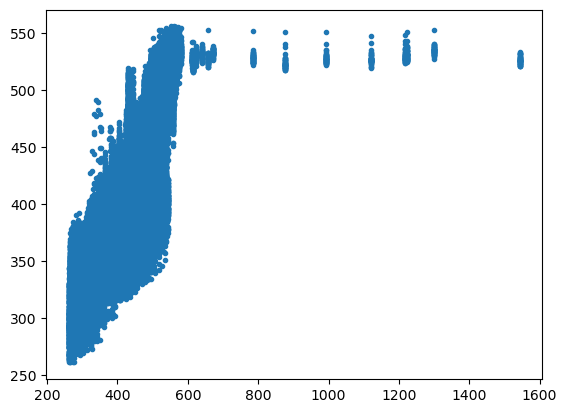

In [42]:
plt.scatter(Y_ts, preds_wo_fe,marker='.')

In [57]:
np.where(Y_ts>1000)

(array([704, 705, 705, 706, 706, 706, 707, 707, 707, 707, 708, 708, 708,
        708, 709, 709, 709, 709, 710, 710, 710, 710, 711, 711, 711, 711,
        712, 712, 712, 712, 713, 713, 713, 713, 714, 714, 714, 714, 715,
        715, 715, 715, 716, 716, 716, 716, 717, 717, 717, 717, 718, 718,
        718, 718, 719, 719, 719, 719, 720, 720, 720, 720, 721, 721, 721,
        721, 722, 722, 722, 722, 723, 723, 723, 723, 724, 724, 724, 724,
        725, 725, 725, 725, 726, 726, 726, 726, 727, 727, 727, 727, 728,
        728, 728, 728, 729, 729, 729, 729, 730, 730, 730, 730, 731, 731,
        731, 731, 732, 732, 732, 732, 733, 733, 733, 733, 734, 734, 734,
        734, 735, 735, 735, 735, 736, 736, 736, 736, 737, 737, 737, 737,
        738, 738, 738, 738, 739, 739, 739, 739, 740, 740, 740, 740, 741,
        741, 741, 741, 742, 742, 742, 742, 743, 743, 743, 743, 744, 744,
        744, 744, 745, 745, 745, 745, 746, 746, 746, 746, 747, 747, 747,
        747, 748, 748, 748, 748, 749, 749, 749, 749

In [51]:
np.arange(preds_wo_fe[0,:].shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

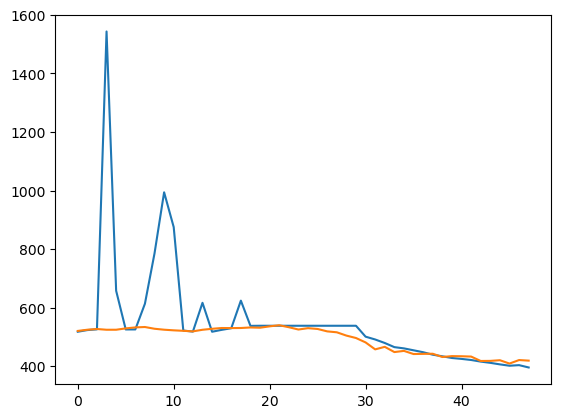

In [66]:
i = 825
x = np.arange(Y_ts.values[i,:].shape[0])
y1 = Y_ts.values[i,:]
y2 = preds_wo_fe[i,:]
plt.plot(x,y1)
plt.plot(x,y2)
plt.show()

In [294]:
pd.set_option('display.max_rows', 700)

In [254]:
feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                model_wo_fe.estimators_[0].feature_importances_.reshape(-1,1)),axis=1),columns = ['feature','importance'])
feature_imp = feature_imp[feature_imp['importance']!=0].sort_values(by='importance',ascending=False)
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [255]:
feature_imp.head(100)

,feature,importance
17759,load_MW(t),0.177667
17763,ts_hour_of_day,0.028667
17758,load_MW(t-1),0.016667
17764,ts_minute_of_hour,0.014333
17730,load_MW(t-29),0.003333
17654,load_MW(t-105),0.003333
17749,load_MW(t-10),0.003
9424,weatherkit_forecast_temp_C(t+17),0.002667
17656,load_MW(t-103),0.002667
6532,weatherkit_observed_wind_direction_deg(t-187),0.002333


In [276]:
X.columns.shape

(17765,)

In [284]:
all_imp = np.array([model_wo_fe.estimators_[i].feature_importances_ for i in range(len(model_wo_fe.estimators_))])

feature_imp = pd.DataFrame(np.concatenate((np.array(X.columns).reshape(-1,1),
                           all_imp.sum(axis=0).reshape(-1,1)),axis=1),
                           columns = ['feature','importance'])
feature_imp = feature_imp.sort_values(by='importance',ascending=False)

In [285]:
feature_imp.importance=feature_imp.importance/feature_imp.importance.sum()

In [286]:
feature_imp['cum_imp']=feature_imp.importance.cumsum()

In [305]:
feature_imp.head(15033)

,feature,importance,cum_imp
17759,load_MW(t),0.030375,0.030375
17762,ts_day_of_week,0.019729,0.050104
17763,ts_hour_of_day,0.007882,0.057986
17761,ts_day_of_month,0.005965,0.063951
17758,load_MW(t-1),0.002479,0.066431
...,...,...,...
11058,weatherkit_forecast_air_pressure_kPa(t-1133),0.000014,0.979944
3491,weatherkit_observed_air_pressure_kPa(t-540),0.000014,0.979958
11054,weatherkit_forecast_air_pressure_kPa(t-1137),0.000014,0.979972
11050,weatherkit_forecast_air_pressure_kPa(t-1141),0.000014,0.979986


In [311]:
feature_imp.cum_imp.astype(float).describe(percentiles=[0.25,.5,.75,.8,.90,.95])

count    17765.000000
mean         0.747985
std          0.235062
min          0.030375
25%          0.591424
50%          0.820361
75%          0.950812
80%          0.968600
90%          0.991921
95%          0.998089
max          1.000000
Name: cum_imp, dtype: float64

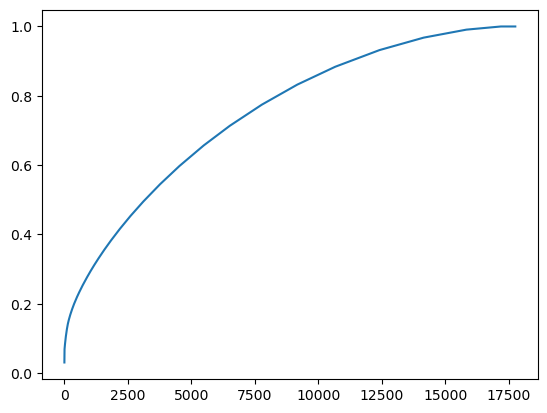

In [312]:
x = np.arange(feature_imp.shape[0])
y = feature_imp.cum_imp.astype(float)
plt.plot(x,y)
plt.show()

In [ ]:
# 15033 out of 17765 features accounted for 98% of feature importance
# count    17765.000000
# mean         0.747985
# std          0.235062
# min          0.030375
# 25%          0.591424
# 50%          0.820361
# 75%          0.950812
# 80%          0.968600
# 90%          0.991921
# 95%          0.998089
# max          1.000000
# Name: cum_imp, dtype: float64

In [297]:
feature_imp.shape

(17765, 3)